# Part 1 - Cats or Dogs and visualize Convolutions 


This is the 1st-part of 3-parts series for Convolutional Neural Networks. 
1. Basics: binary classification and "Convolution" visualized as transformations through DNN-layers (this part)
2. Step up: multi-class classification with Rock, Paper, Scissors 
3. Production Scale: Horse or Human with Image Augmentation, through convolutions, and Transfer Learning

Specifically in this part, we will 
1. Load images that are derived from Kaggle's ["Dogs vs. Cats" dataset](https://www.kaggle.com/c/dogs-vs-cats/data) which contains 25,000 images. 
2. Use `ImageDataGenerator` to prepare train/validation data
3. Build the model
4. Visualize  image transformations through each iterations of "Convolution"
5. Train and evaluate accuracy/loss 

# 1. Dataset


Our data is a subset or 2,000 images of Kaggle, to decrease training time.

In [1]:
!wget --no-check-certificate https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2022-04-01 16:38:00--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.40.240, 142.250.64.80, 142.251.40.112, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.40.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: 'cats_and_dogs_filtered.zip'

     0K .......... .......... .......... .......... ..........  0% 1.99M 33s
    50K .......... .......... .......... .......... ..........  0% 2.64M 29s
   100K .......... .......... .......... .......... ..........  0% 2.76M 27s
   150K .......... .......... .......... .......... ..........  0% 1.67M 30s
   200K .......... .......... .......... .......... ..........  0% 8.36M 26s
   250K .......... .......... .......... .......... ..........  0% 1.85M 27s
   300K .......... .......... .......... .......... ..........  0% 9.36M 24s
   350K .......... .......

Extract contents

In [2]:
import zipfile

# Unzip the archive
local_zip = 'cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()

zip_ref.close()

  6000K .......... .......... .......... .......... ..........  9% 3.94M 21s
  6050K .......... .......... .......... .......... ..........  9% 4.15M 21s
  6100K .......... .......... .......... .......... ..........  9% 5.73M 21s
  6150K .......... .......... .......... .......... ..........  9% 4.59M 21s
  6200K .......... .......... .......... .......... ..........  9% 4.43M 21s
  6250K .......... .......... .......... .......... ..........  9% 3.40M 21s
  6300K .......... .......... .......... .......... ..........  9% 5.29M 21s
  6350K .......... .......... .......... .......... ..........  9% 3.28M 21s
  6400K .......... .......... .......... .......... ..........  9% 4.28M 21s
  6450K .......... .......... .......... .......... ..........  9% 4.07M 21s
  6500K .......... .......... .......... .......... ..........  9% 1.05M 21s
  6550K .......... .......... .......... .......... ..........  9% 7.46M 21s
  6600K .......... .......... .......... .......... ..........  9% 7.48M 21s

 49600K .......... .......... .......... .......... .......... 74% 4.77M 4s
 49650K .......... .......... .......... .......... .......... 74% 3.42M 4s
 49700K .......... .......... .......... .......... .......... 74% 5.18M 4s
 49750K .......... .......... .......... .......... .......... 74% 3.33M 4s
 49800K .......... .......... .......... .......... .......... 74% 4.21M 4s
 49850K .......... .......... .......... .......... .......... 74% 4.44M 4s
 49900K .......... .......... .......... .......... .......... 74% 7.08M 4s
 49950K .......... .......... .......... .......... .......... 74% 4.36M 4s
 50000K .......... .......... .......... .......... .......... 74% 4.96M 4s
 50050K .......... .......... .......... .......... .......... 74% 2.04M 4s
 50100K .......... .......... .......... .......... .......... 74% 5.78M 4s
 50150K .......... .......... .......... .......... .......... 74% 3.10M 4s
 50200K .......... .......... .......... .......... .......... 75% 6.83M 4s
 50250K ....

Train and validation subdirectories.

In [3]:
import os

base_dir = 'cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
print('training direcotry:', train_dir)
print('validation directory: ', validation_dir)

# Directory with training cat/dog pictures
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

print('total training cat images :', len(os.listdir(train_cats_dir ) ))
print('total training dog images :', len(os.listdir(train_dogs_dir ) ))

# Directory with validation cat/dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

print('total validation cat images :', len(os.listdir(validation_cats_dir ) ))
print('total validation dog images :', len(os.listdir(validation_dogs_dir ) ))

train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )

training direcotry: cats_and_dogs_filtered\train
validation directory:  cats_and_dogs_filtered\validation
total training cat images : 1000
total training dog images : 1000
total validation cat images : 500
total validation dog images : 500


Should have 1,000 training images and 500 validation images.

Set up to display a batch of 8 cat and 8 dog pictures in 4x4 for better sense. 

In [4]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Output images in 4x4 
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images

We can re-run the cell gets a new batch of 8 images.

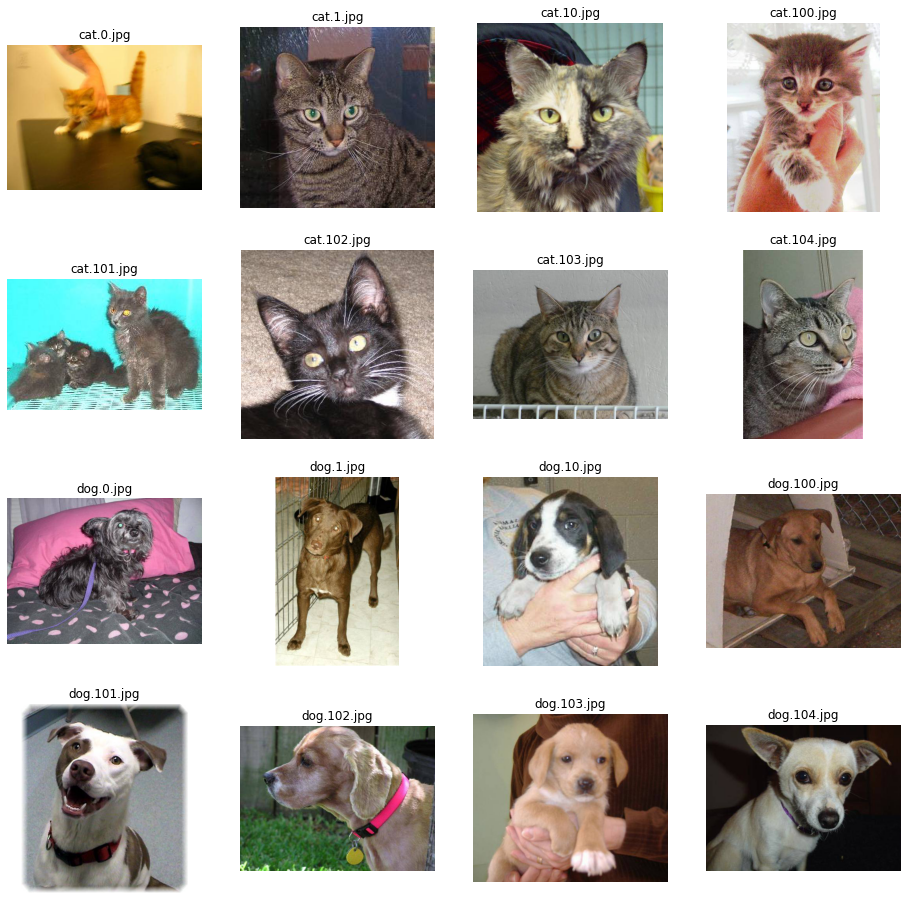

In [5]:
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[ pic_index-8:pic_index] 
               ]

next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') 

  img = mpimg.imread(img_path)
  plt.title(img_path.rsplit('\\',1)[1])
  plt.imshow(img)

plt.show()

As images come in all shapes and sizes, we need to need to tweak the images first. 

# 2. Data Preprocessing

Normalize pixel values into simple range of [0, 1], then apply `keras.preprocessing.image.ImageDataGenerator` 

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

# batches of 20 
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))     

validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


# 3. Model 

- Use 150x150 for input image shape, therefore 
- Layers
  1. First convolutional layer is 150x150 size + 3 for RGB color 
  2. Followed by several convolutional layers with MaxPooling 
  3. Flatten
  4. Dense layer
  5. As binary classification, sigmoid activation will do 

In [7]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # use image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results 
    tf.keras.layers.Flatten(), 
    # a 512-neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    # Only 1 output neuron with Sigmoid, as it is just where 0 for 'cats' and 1 for 'dogs'
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

Similarly, `binary_crossentropy` loss.

Fiddle around with `rmsprop` of SGD optimizer with a learning rate of `0.001`. 

In [8]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])

# 4. Visualize image transformations through each "Convolutions"

Let's visualize how an input gets transformed as it goes through the model, to get a feel of features our CNN has learned, 
1. Pick a random image from the training set
2. Generate a figure where each row is the output of a layer, and each image in the row is a specific filter in that output `feature map`. 
3. Rerun this cell to generate intermediate representations for a variety of training images.

radomly picked image


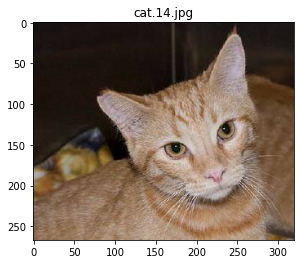

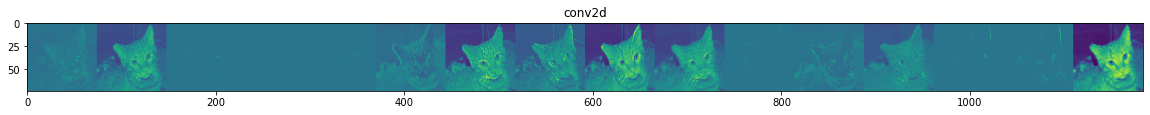

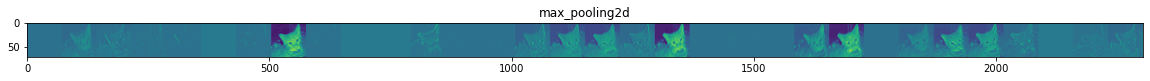

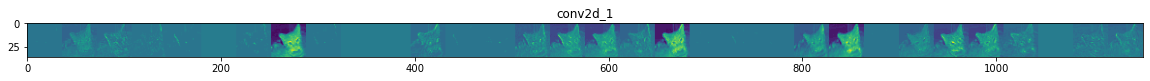

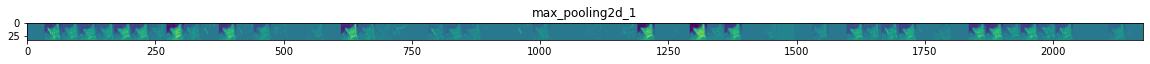

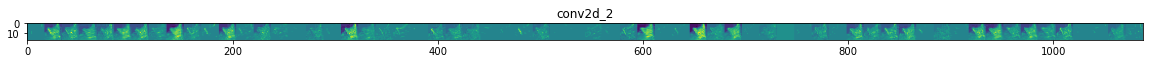

In [9]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Prepare a random input image from the training set.
cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cat_fnames]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dog_fnames]
img_path = random.choice(cat_img_files + dog_img_files)

print("radomly picked image")
img = mpimg.imread(img_path)
plt.title(img_path.rsplit('\\',1)[1])
plt.imshow(img)


img = load_img(img_path, target_size=(150, 150))  
x   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)

# Scale by 1/255
x /= 255.0


# Define a new Model that will take an image as input
# Output intermediate representations for all layers after that
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Run the image through the network, thus obtaining all intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# Get names of the layers
layer_names = [layer.name for layer in model.layers]

# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  
  if len(feature_map.shape) == 4:
    
    # Do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # Tile the images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    # Postprocess the feature to be visually palatable
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
##      x /= x.std()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    # Display the grid
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' ) 

Notice how the pixels highlighted turn to increasingly abstract and compact representations.

# 5. Training

In [10]:
history = model.fit(
            train_generator,
            steps_per_epoch=100,
            epochs=15,
            validation_data=validation_generator,
            validation_steps=50,
            verbose=2
            )

Epoch 1/15
100/100 - 72s - loss: 0.9157 - accuracy: 0.5375 - val_loss: 0.6542 - val_accuracy: 0.6390 - 72s/epoch - 719ms/step
Epoch 2/15
100/100 - 55s - loss: 0.5968 - accuracy: 0.6745 - val_loss: 0.6274 - val_accuracy: 0.6070 - 55s/epoch - 550ms/step
Epoch 3/15
100/100 - 55s - loss: 0.5227 - accuracy: 0.7465 - val_loss: 0.5513 - val_accuracy: 0.7210 - 55s/epoch - 547ms/step
Epoch 4/15
100/100 - 57s - loss: 0.4377 - accuracy: 0.8000 - val_loss: 0.6251 - val_accuracy: 0.7170 - 57s/epoch - 566ms/step
Epoch 5/15
100/100 - 50s - loss: 0.3400 - accuracy: 0.8495 - val_loss: 0.6484 - val_accuracy: 0.7100 - 50s/epoch - 497ms/step
Epoch 6/15
100/100 - 49s - loss: 0.2621 - accuracy: 0.8890 - val_loss: 0.7436 - val_accuracy: 0.7140 - 49s/epoch - 489ms/step
Epoch 7/15
100/100 - 50s - loss: 0.1913 - accuracy: 0.9290 - val_loss: 0.8057 - val_accuracy: 0.7010 - 50s/epoch - 504ms/step
Epoch 8/15
100/100 - 49s - loss: 0.1216 - accuracy: 0.9490 - val_loss: 0.9877 - val_accuracy: 0.7260 - 49s/epoch - 494

# 6. Plot accuracy/loss 

In [11]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

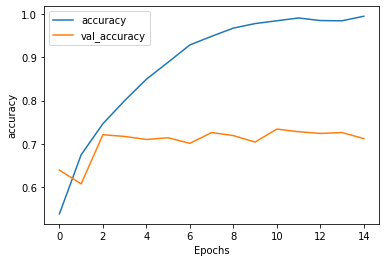

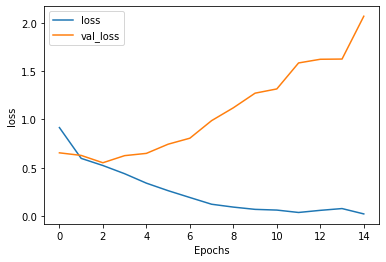

In [12]:
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

# 7. Conclusion

Our model is overfitting. 

Of course we can do hyperparameter tuning like drop-out, and we can also try to crop out. 

Additionally, we could try rotations (cats lying in different positions), shearing (or eigenvector) and other techniques, in Part 2.